<a href="https://colab.research.google.com/github/256-katendechris-256/skin-disease-ML/blob/main/Skin_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


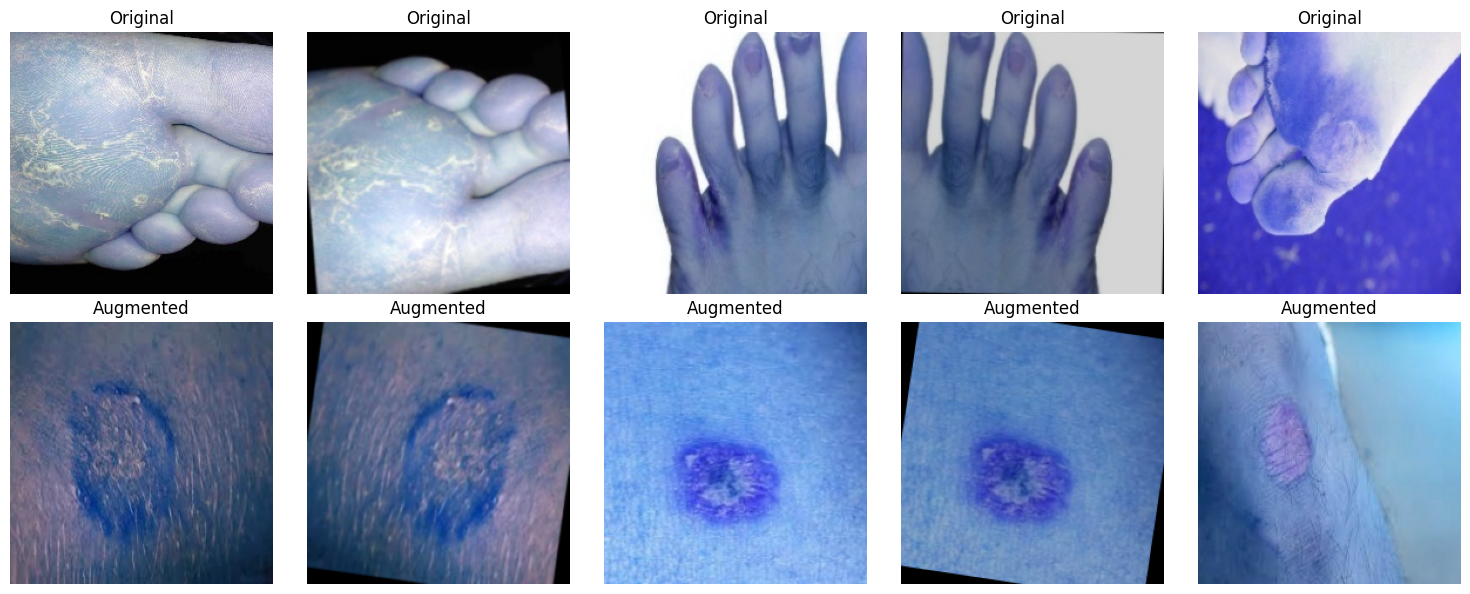

Number of images: 1668
Number of labels: 1668


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import imgaug as ia
from imgaug import augmenters as iaa

# Set seed for reproducibility
ia.seed(1)

# Define augmentation sequence
seq = iaa.Sequential([
    iaa.Fliplr(0.5),               # Horizontal flip with 50% probability
    iaa.Flipud(0.5),               # Vertical flip with 50% probability
    iaa.Affine(rotate=(-15, 15)),  # Random rotation between -15 and 15 degrees
    iaa.Multiply((0.8, 1.2)),      # Multiply image intensity by a random factor between 0.8 and 1.2
    iaa.GaussianBlur(sigma=(0, 1.0)),  # Apply Gaussian blur with a random sigma between 0 and 1.0
])

label_encoder = LabelEncoder()

# Define the path to the dataset
dataset_path = "/content/drive/MyDrive/skin-disease-datasaet/train_set"

# Get a list of all subfolders
subfolders = os.listdir(dataset_path)

# Initialize empty lists for images and labels
images = []
labels = []

# Iterate through each subfolder
for subfolder in subfolders:
    # Get the path to the current subfolder
    subfolder_path = os.path.join(dataset_path, subfolder)

    # Get a list of all files in the current subfolder
    files = os.listdir(subfolder_path)

    # Iterate through each file in the current subfolder
    for file in files:
        # Check if the file is an image
        if file.endswith(".jpg") or file.endswith(".png"):
            # Get the path to the current image
            image_path = os.path.join(subfolder_path, file)

            # Read the image
            image = cv2.imread(image_path)

            # Resize the image
            image = cv2.resize(image, (224, 224))

            # Convert the image to a NumPy array
            image = np.array(image)

            # Append the original image and its label to the lists
            images.append(image)
            labels.append(subfolder)

            # Apply augmentation
            augmented_images = seq.augment_images([image])

            # Append the augmented images and their labels to the lists
            images.extend(augmented_images)
            labels.extend([subfolder] * len(augmented_images))

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Preprocess the images
preprocessed_images = images / 255.0

# Display some original and augmented images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    axes[0, i].imshow(images[i])
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')
    axes[1, i].imshow(images[len(images)//2 + i])
    axes[1, i].set_title("Augmented")
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

# Check if the number of images and labels match
print("Number of images:", len(preprocessed_images))
print("Number of labels:", len(labels))

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Encode labels
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
encoded_labels = np.clip(encoded_labels, 0, 6)

# Train the model
model.fit(preprocessed_images, encoded_labels, epochs=40)


Epoch 1/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.2661 - loss: 1.8966
Epoch 2/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.2991 - loss: 1.8452
Epoch 3/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.2944 - loss: 1.8403
Epoch 4/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.2875 - loss: 1.8352
Epoch 5/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.2996 - loss: 1.8122
Epoch 6/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3023 - loss: 1.7878
Epoch 7/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3301 - loss: 1.7412
Epoch 8/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3088 - loss: 1.7976
Epoch 9/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.3475 - loss: 1.7026
Epoch 10/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3803 - loss: 1.6590
Epoch 11/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.3617 - loss: 1.7132
Epoch 12/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy

In [ ]:
base_models = {
    "ResNet50": tf.keras.applications.ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3)),
    "InceptionV3": tf.keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=(224, 224, 3)),
    "Xception": tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=(224, 224, 3)),
    "VGG16": tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3)),
    "VGG19": tf.keras.applications.VGG19(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
}

# Define the input layer
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

# Define the output layers for each base model
output_layers = {}
for name, base_model in base_models.items():
    x = base_model(input_layer)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    output_layers[name] = tf.keras.layers.Dense(7, activation="softmax", name=name)(x)

# Create the final model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layers)

# Freeze the base model layers
for base_model in base_models.values():
    base_model.trainable = False

# Compile the model
# Provide a dictionary of metrics, where keys are output names and values are metrics for that output.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics={name: 'accuracy' for name in base_models}) # Providing a metric for each output

# Train the model
model.fit(preprocessed_images, encoded_labels, epochs=40)


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:664: UserWarning: Gradients do not exist for variables ['kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 201ms/step - InceptionV3_accuracy: 0.4207 - loss: 1.6083
Epoch 2/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step - InceptionV3_accuracy: 0.7491 - loss: 0.8117
Epoch 3/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - InceptionV3_accuracy: 0.8343 - loss: 0.5803
Epoch 4/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - InceptionV3_accuracy: 0.8775 - loss: 0.4695
Epoch 5/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - InceptionV3_accuracy: 0.8988 - loss: 0.4168
Epoch 6/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - InceptionV3_accuracy: 0.9182 - loss: 0.3515
Epoch 7/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - InceptionV3_accuracy: 0.9392 - loss: 0.3168
Epoch 8/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - InceptionV3_accuracy: 0.9434 - loss: 0.2849
Epoch 9/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - InceptionV3_accuracy: 0.9388 - loss: 0.2860
Epoch 10/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - InceptionV3_accuracy: 0.9459 - loss: 0.2571
Epoch 11/40
53/53 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the model
model.evaluate(preprocessed_images, encoded_labels)

53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 159ms/step - InceptionV3_accuracy: 0.9958 - loss: 0.0776


[0.07750649750232697, 0.9940047860145569]

In [ ]:
import numpy as np
# Load the test dataset
test_dataset_path = "/content/drive/MyDrive/skin-disease-datasaet/test_set"

# Get a list of all subfolders in the test dataset
test_subfolders = os.listdir(test_dataset_path)

# Initialize empty lists for test images and labels
test_images = []
test_labels = []

# Iterate through each subfolder in the test dataset
for test_subfolder in test_subfolders:
    # Get the path to the current subfolder
    test_subfolder_path = os.path.join(test_dataset_path, test_subfolder)

    # Get a list of all files in the current subfolder
    test_files = os.listdir(test_subfolder_path)

    # Iterate through each file in the current subfolder
    for test_file in test_files:
        # Check if the file is an image
        if test_file.endswith(".jpg") or test_file.endswith(".png"):
            # Get the path to the current image
            test_image_path = os.path.join(test_subfolder_path, test_file)

            # Read the image
            test_image = cv2.imread(test_image_path)

            # Resize the image
            test_image = cv2.resize(test_image, (224, 224))

            # Convert the image to a NumPy array
            test_image = np.array(test_image)

            # Add the image and its label to the lists
            test_images.append(test_image)
            test_labels.append(test_subfolder)

# Convert the lists to NumPy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Preprocess the test images
test_preprocessed_images = test_images / 255.0

# Encode the test labels
encoded_test_labels = label_encoder.transform(test_labels)

encoded_test_labels = np.clip(encoded_test_labels, 0, 6)

# Evaluate the model on the test dataset
model.evaluate(test_preprocessed_images, encoded_test_labels)

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - InceptionV3_accuracy: 0.9699 - loss: 0.1556


[0.21055330336093903, 0.9493087530136108]

In [ ]:
import cv2
import numpy as np

# Get a sample image
image_path = "/content/drive/MyDrive/skin-disease-datasaet/test_set/FU-athlete-foot/FU-athlete-foot (1).jpeg"

# Read the image
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    print("Error: Unable to load image.")
else:
    # Resize the image
    image = cv2.resize(image, (224, 224))

    # Convert the image to a NumPy array
    image = np.array(image)

    # Preprocess the image
    image = image / 255.0

    # Make a prediction
    prediction = model.predict(np.expand_dims(image, axis=0))

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    # Get the class name
    class_name = label_encoder.classes_[predicted_class]

    # Print the predicted class
    print("Predicted class:", class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
Predicted class: BA- cellulitis
